In [220]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<h1>Load the data</h1>

In [9]:
df=pd.read_csv('Car_details.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [11]:
print(df.info(),"\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
# Checking nubmer of rows and columns
print("(rows,columns) = ",df.shape,"\n")

(rows,columns) =  (205, 26) 



<h3># Data Cleaning and Processing </h3>

In [14]:
# Checking for null values
print(df.isnull().sum(),"\n")

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64 



In [15]:
# lets check if the data has any duplicate data, and remove
print("Number of duplicates : ",df.duplicated().sum(),"\n")

Number of duplicates :  0 



In [16]:
# Drop 'car_ID'  # This column does not have significance for our model
 
df.drop('car_ID',axis=1,inplace=True)

In [17]:
df.dropna(inplace=True) # also drop the missing values


In [18]:
# Create the car_company variable
df['car_company'] = df['CarName'].apply(lambda x: x.split(" ")[0])


In [19]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


<h3>#Visualizing the data</h3>

In [21]:
# As we can see there are no null values and duplicates in the data.
# Now, lets check about the statistical information about the data
print(df.describe(),"\n")

        symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000  

<h3>The price column is the target column and the remaining columns are independent variables.\n</h3>

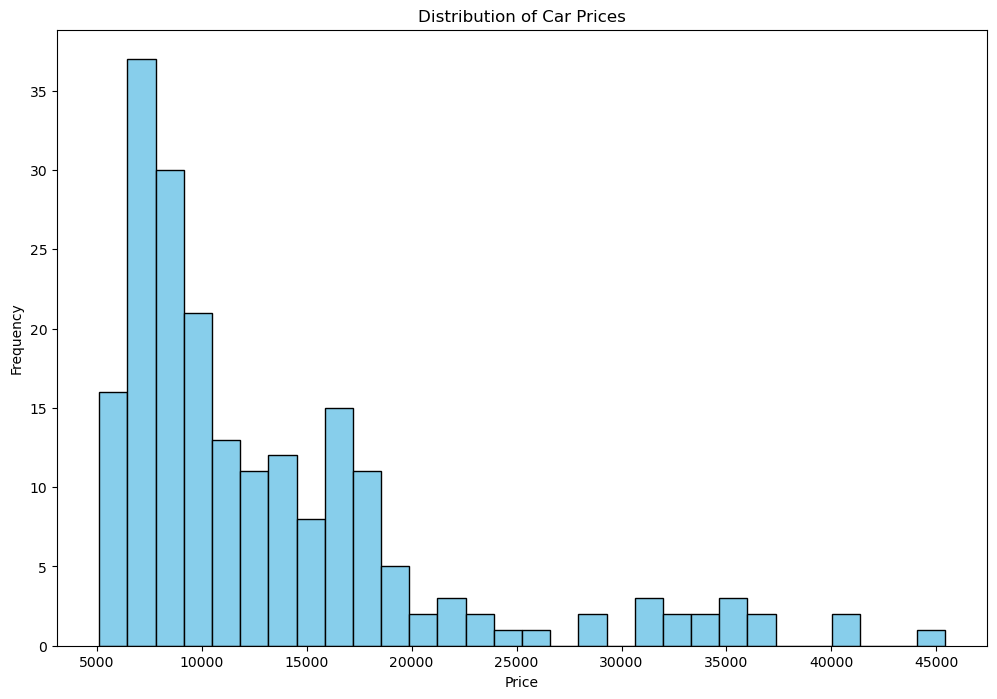

In [23]:
# Checking how the price cloumn is distributed through the dataset
plt.figure(figsize=(12, 8))
plt.hist(df['price'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

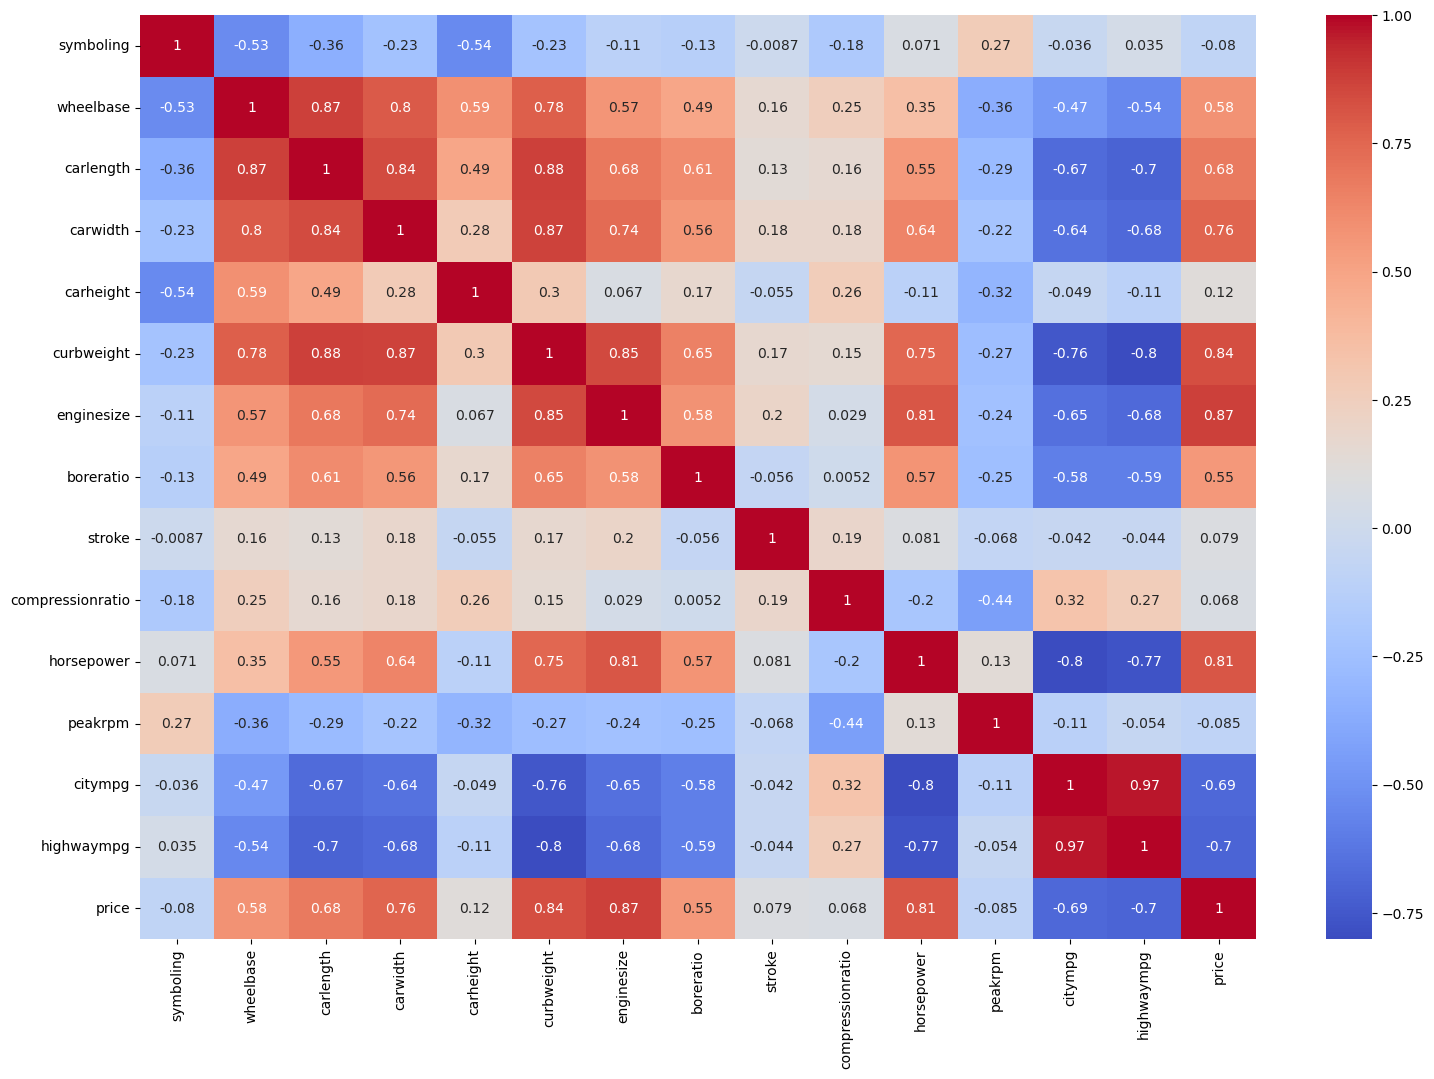

In [24]:
# Selecting only numeric columns from the DataFrame for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Displaying the heatmap of correlation among numerical variables
plt.figure(figsize=(18, 12))
corr = numeric_df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()


In [25]:
# Feature selection and engineering
X = df.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber','enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg',
'car_company']]
y = df['price']


In [26]:
# Label encoding for categorical variables
categorical = X.select_dtypes(include=['object'])
dummies = pd.get_dummies(categorical, drop_first=True)
X = X.drop(list(categorical.columns), axis=1)
X = pd.concat([X,dummies], axis=1)

In [27]:
# Scale the features
from sklearn.preprocessing import scale
dat = X.columns
X = pd.DataFrame(scale(X))
X.columns = dat
print(X.columns,"\n")

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_alfa-romero',
       'car_company_audi', 'car_company_bmw', 'car_company_buick',
       'car_company_chevrolet', 'car_company_dodge', 'car_company_ho

In [96]:
#Model Training and Selection

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


<h2> We will use two differnt approach  </h2>

<h1>Method 1</h1><h2> Performs feature selection on the entire dataset </h2>

In [83]:
# Using Xgboot Regressor and Recursive Feature Elimination with Cross-Validation (RFECV) To train the model and perform feature selection
from xgboost import XGBRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the XGBoost model
model = XGBRegressor(random_state=42)

# Perform Recursive Feature Elimination with Cross-Validation (RFECV)
# Assuming you have X and y prepared previously
selector = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')
selector = selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.support_]

# Train the model on the selected features
model.fit(X[selected_features], y)

# Make predictions
predictions = model.predict(X[selected_features])

# Evaluate the model
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 71282.41831810091
Mean Absolute Error: 77.85195546874999


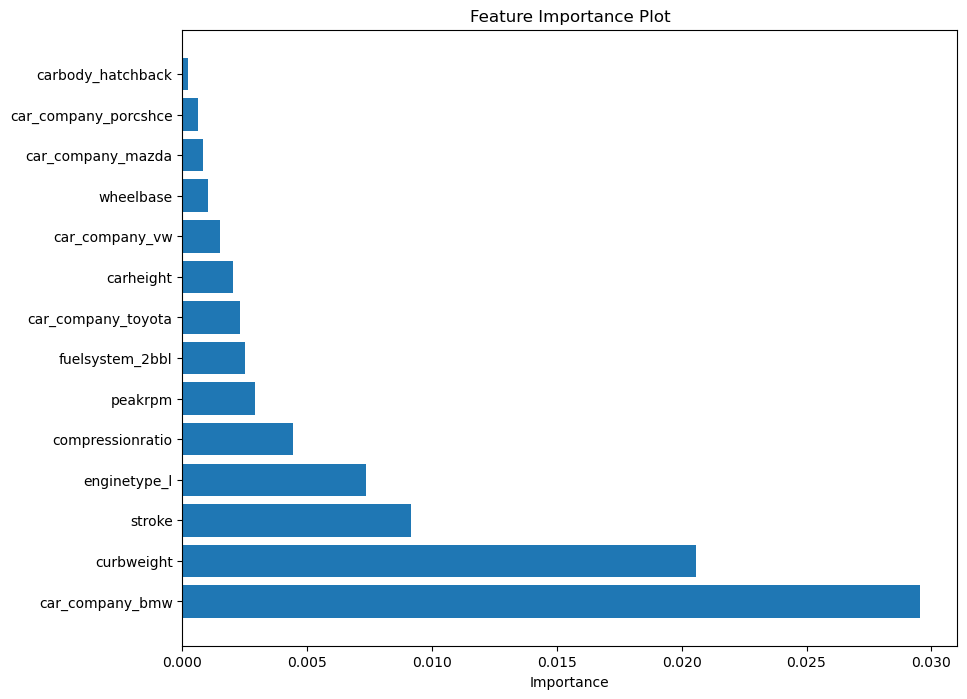

In [133]:
# Accessing feature importances if available (for example, for tree-based models like XGBoost)
feature_importance = model.feature_importances_

# Sort feature importances and corresponding feature names
sorted_indices = np.argsort(feature_importance)[::2]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_selected_features = selected_features[sorted_indices]

# Plotting sorted feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, tick_label=sorted_selected_features)
plt.xlabel('Importance')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


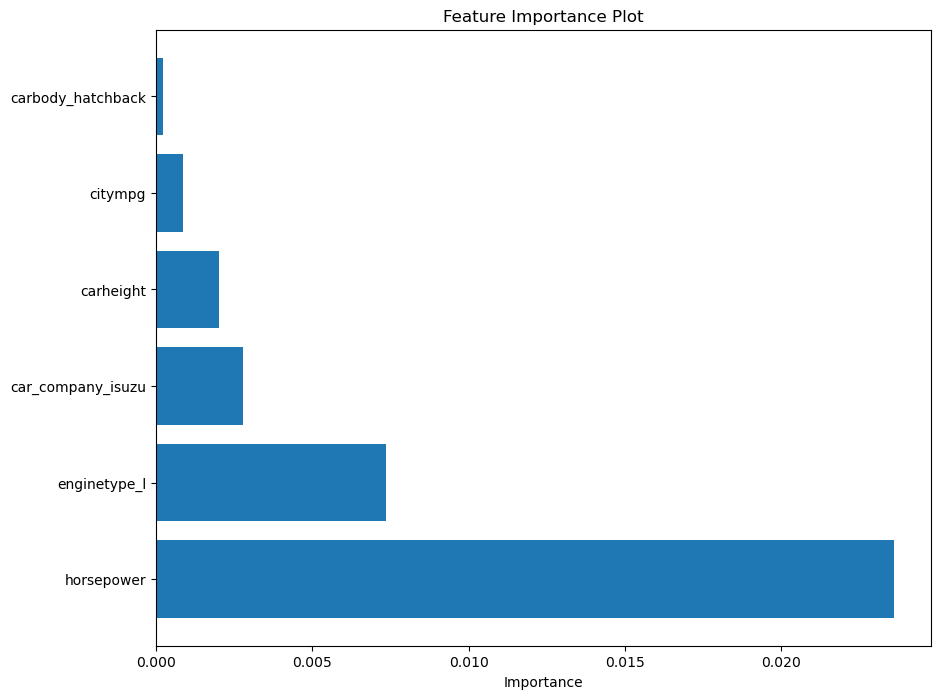

In [127]:
# Accessing feature importances if available (for example, for tree-based models like XGBoost)
feature_importance = model.feature_importances_

# Sort feature importances and corresponding feature names
sorted_indices = np.argsort(feature_importance)[::5]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_selected_features = selected_features[sorted_indices]

# Plotting sorted feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, tick_label=sorted_selected_features)
plt.xlabel('Importance')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()



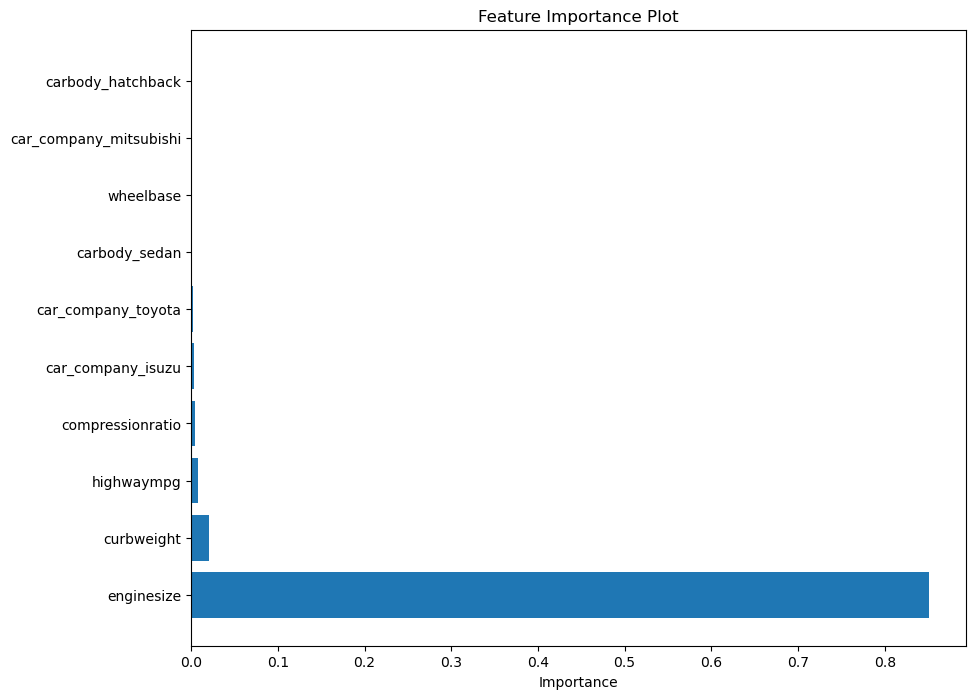

In [131]:
# Accessing feature importances if available (for example, for tree-based models like XGBoost)
feature_importance = model.feature_importances_

# Sort feature importances and corresponding feature names
sorted_indices = np.argsort(feature_importance)[::3]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_selected_features = selected_features[sorted_indices]

# Plotting sorted feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, tick_label=sorted_selected_features)
plt.xlabel('Importance')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


The visualizations show that the most important aspects of a car to the customer in this dataset are:

<b style="font-size: larger;">i. Engine size</b> <br>
<b style="font-size: larger;">ii. The brand (BMW)</b> <br>
<b style="font-size: larger;">iii. Horsepower</b>

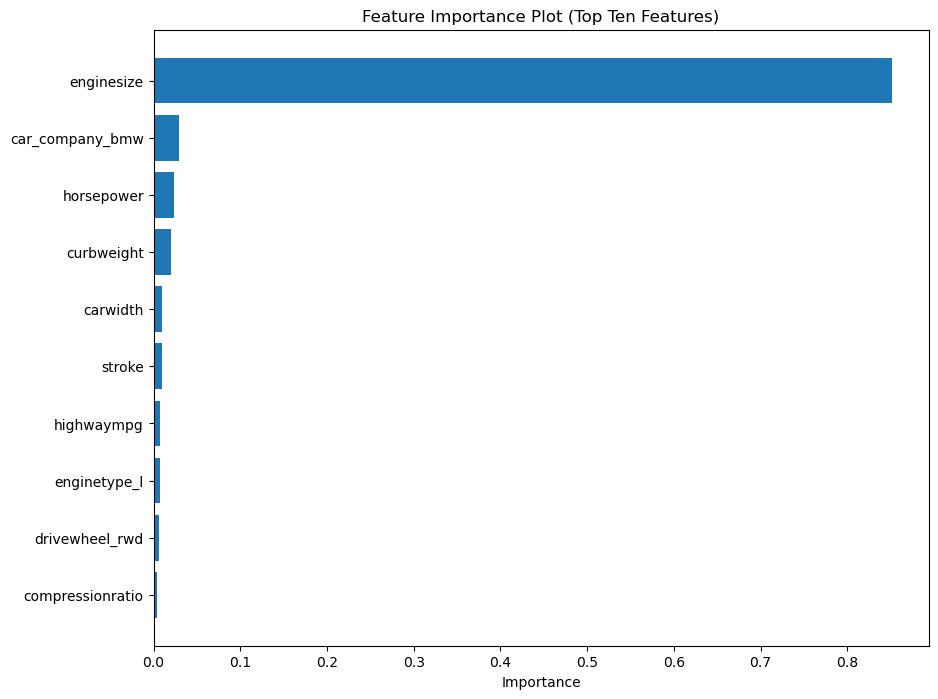

The top 3 features are:, i. Engine size, ii. The brand (BMW), and iii. Horsepower


In [171]:
# Selecting only the first ten features
top_ten_importance = sorted_feature_importance[:10]
top_ten_features = sorted_selected_features[:10]

# Plotting sorted feature importances for the top ten features
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_ten_importance)), top_ten_importance, tick_label=top_ten_features)
plt.xlabel('Importance')
plt.title('Feature Importance Plot (Top Ten Features)')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# Output showing the top 10 features
print("The top 3 features are:, i. Engine size, ii. The brand (BMW), and iii. Horsepower")


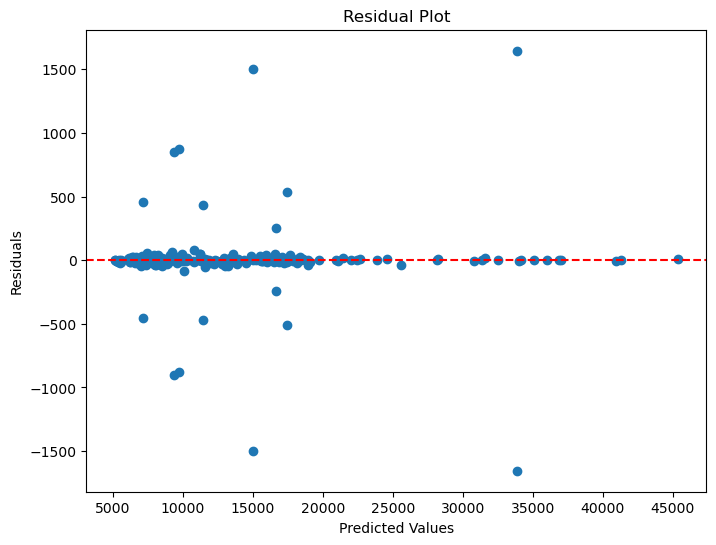

In [109]:
# Calculating residuals
residuals = y - predictions

# Plotting residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [103]:
# Conclusion of the first code block
print("Model training and evaluation using XGBoost and RFECV for feature selection completed.")


Model training and evaluation using XGBoost and RFECV for feature selection completed.


The first code follows this workflow:

1. Uses Recursive Feature Elimination with Cross-Validation (RFECV) to select the features.
2. Trains the XGBoost regressor model on the selected features.
3. Makes predictions and evaluates the model using Mean Squared Error (MSE) and Mean Absolute Error (MAE).

<h3>The first approach performs feature selection on the entire dataset and trains the model on the reduced feature set.</h3>


<h1>Method 2</h1><h2> Splits the data into training and test sets and conducts feature selection on the training set</h2>

In [187]:
#Model Selection and Training

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [189]:
#For better model , I am using xgboot regressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Initialize and train the XGBoost model
model = XGBRegressor(random_state=42)

In [191]:
# Perform recursive feature elimination with cross-validation
rfecv = RFECV(estimator=model)
X_train_selected = rfecv.fit_transform(X_train, y_train)

In [192]:
# Print the optimal number of features
print("Optimal number of features:", rfecv.n_features_)

Optimal number of features: 4


In [193]:
# Retrain the model with the selected features
model.fit(X_train_selected, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [194]:
# Transform the test set with the selected features
X_test_selected = rfecv.transform(X_test)

In [199]:
# Make predictions on the test set
y_pred = model.predict(X_test_selected)

In [201]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

Mean Squared Error (MSE): 6101082.262691221
Mean Absolute Error (MAE): 1704.7362445693598


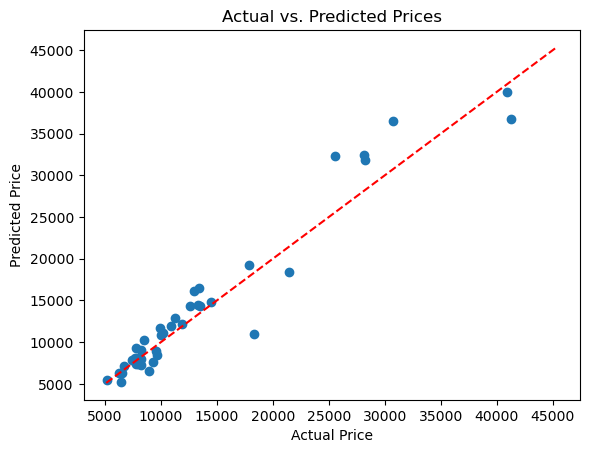

In [203]:
# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
# Plot actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()


In [210]:
from sklearn.metrics import r2_score
print("R2 score is ",r2_score(y_true=y_test, y_pred=y_pred),"\n")

R2 score is  0.9227163476763907 



<h3>"An R-squared score of 0.92 indicates that approximately 92% of the variance in the target variable is explained by the model. In other words, the model captures a large portion of the variation in the target variable and provides a good fit to the data.\n")
</h3>

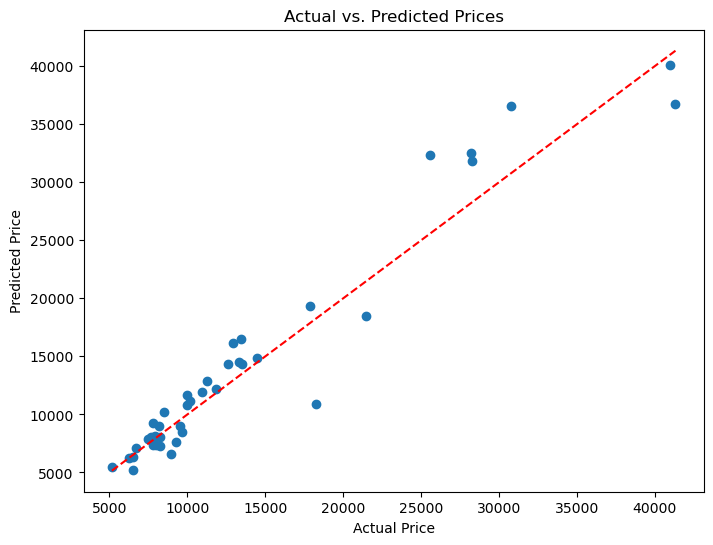

In [111]:
# Plotting actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()


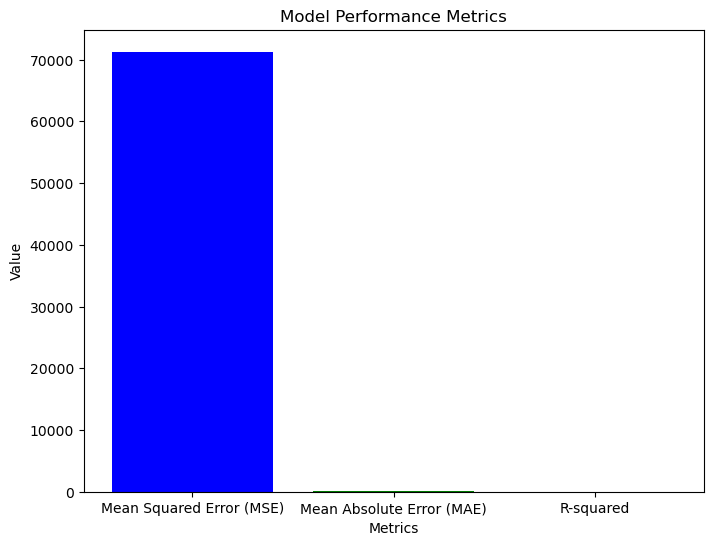

In [113]:
# Model performance metrics
metrics = {'Mean Squared Error (MSE)': mse, 'Mean Absolute Error (MAE)': mae, 'R-squared': r2_score(y_test, y_pred)}

# Plotting model performance metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Performance Metrics')
plt.show()


In [101]:
# Conclusion of the second code block
print("Model training, feature selection, evaluation, and visualization completed.")


Model training, feature selection, evaluation, and visualization completed.


The second code follows this workflow:

1. Splits the data into training and testing sets.
2. Initializes the XGBoost regressor model.
3. Performs Recursive Feature Elimination with Cross-Validation (RFECV) on the training set.
4. Retrains the model using the selected features from the training set.
5. Makes predictions on the test set and evaluates the model using Mean Squared Error (MSE) and Mean Absolute Error (MAE).
6. Visualizes the relationship between the actual and predicted prices.

<h3> The second approach splits the data into training and test sets, conducts feature selection on the training set, and evaluates the model on the test set while providing a visualization of model performance.</h3>

<h1>Thank You</h1>